In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'creditcardfraud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F310%2F23498%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240627%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240627T103148Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D34144845fab67c5bc582256d0bbb11c23269d5846b807807787ddb2460dcb7e042aed45c53f1263b8ea7f70166ecb65a049d148b8c1e9b6683f4d8d891c2d5a741812099063f39500c1e533d12026d9ed1ea8f0738740dc4eedcd8ee38930dcaba9f560d6e203f10d6f6349029907cf91fae846ba6219ce9e34baf801055eb5683d48dc51c4725c30c6a3e8eeb58374d04f2b673cd4db7d082fa52df8e7814c7eafe5edd92d05d25711026765e089f3dbc444c1c6b80bcda5790f052ab9cec24de26aaf0b8b0ee02b3a62c3ba53285b02f71dd590d3c22b95b3af61471b8e1e758ab78daca224246c0bfd7d38d4680028ecd6942427d2079e0913919be89cae7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 69155672 bytes downloaded
Downloaded and uncompressed: creditcardfraud
Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [ ]:
train = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
test = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [ ]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
frames = [test,train]

In [ ]:
d=pd.concat(frames)

In [ ]:
d.shape

(569614, 31)

In [ ]:
d.reset_index(inplace=True)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569614 entries, 0 to 569613
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   level_0  569614 non-null  int64  
 1   index    569614 non-null  int64  
 2   Time     569614 non-null  float64
 3   V1       569614 non-null  float64
 4   V2       569614 non-null  float64
 5   V3       569614 non-null  float64
 6   V4       569614 non-null  float64
 7   V5       569614 non-null  float64
 8   V6       569614 non-null  float64
 9   V7       569614 non-null  float64
 10  V8       569614 non-null  float64
 11  V9       569614 non-null  float64
 12  V10      569614 non-null  float64
 13  V11      569614 non-null  float64
 14  V12      569614 non-null  float64
 15  V13      569614 non-null  float64
 16  V14      569614 non-null  float64
 17  V15      569614 non-null  float64
 18  V16      569614 non-null  float64
 19  V17      569614 non-null  float64
 20  V18      569614 non-null  

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cols = d.columns
encoder = OrdinalEncoder()
d[cols] = encoder.fit_transform(d[cols])

In [ ]:
print(d.duplicated().sum())
print("/n")
print(d.isnull().sum())

0
/n
level_0    0
index      0
Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
dtype: int64


In [ ]:
# Display the columns of the DataFrame
print(d.columns)

# Check if 'is_fraud' is in the DataFrame
if 'is_fraud' in d.columns:
    print(d['is_fraud'].value_counts())
else:
    print("'is_fraud' column is not present in the DataFrame.")


Index(['level_0', 'index', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'],
      dtype='object')
'is_fraud' column is not present in the DataFrame.


In [ ]:
Not_fraud =d[d.Class==0]
fraud = d[d.Class==1]
Not_fraud.head()
Not_fraud_resample= Not_fraud.sample(492)

In [ ]:
new_df=pd.concat([Not_fraud_resample,fraud],axis=0)
new_df

,level_0,index,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
447185,447185.0,162378.0,74390.0,260013.0,110336.0,55449.0,179316.0,115553.0,24068.0,143208.0,...,40300.0,30458.0,250404.0,106630.0,65335.0,200175.0,62193.0,56764.0,98.0,0.0
518109,518109.0,233302.0,102938.0,265910.0,34625.0,81193.0,60532.0,48919.0,181649.0,19364.0,...,253553.0,268312.0,129739.0,34056.0,124806.0,154257.0,148991.0,58463.0,3230.0,0.0
486398,486398.0,201591.0,90745.0,144739.0,229848.0,136866.0,265083.0,200186.0,245617.0,91576.0,...,249838.0,253194.0,74791.0,5019.0,40025.0,201710.0,67019.0,43829.0,786.0,0.0
530030,530030.0,245223.0,107528.0,116629.0,126570.0,166603.0,59164.0,133787.0,162345.0,257360.0,...,159427.0,108867.0,268389.0,252062.0,2564.0,125378.0,221357.0,265562.0,17397.0,0.0
265597,265597.0,265597.0,115740.0,76439.0,245852.0,64470.0,51722.0,241658.0,6905.0,270505.0,...,178868.0,253629.0,47509.0,146950.0,109127.0,162976.0,268152.0,269542.0,4878.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564670,564670.0,279863.0,121879.0,27277.0,234872.0,1939.0,254185.0,17847.0,3419.0,38851.0,...,267288.0,95138.0,265954.0,79378.0,240244.0,255155.0,251344.0,237164.0,23787.0,1.0
564950,564950.0,280143.0,122034.0,213406.0,245738.0,1524.0,244858.0,192206.0,17667.0,14265.0,...,246672.0,139954.0,76291.0,103705.0,238178.0,252121.0,261597.0,249014.0,75.0,1.0
564956,564956.0,280149.0,122037.0,91114.0,234926.0,16295.0,184357.0,37695.0,170562.0,4708.0,...,266926.0,240217.0,220165.0,135872.0,18542.0,230510.0,261264.0,250716.0,7649.0,1.0
565951,565951.0,281144.0,122537.0,12303.0,187299.0,1237.0,255107.0,57302.0,1218.0,4819.0,...,263255.0,101001.0,15072.0,90235.0,68004.0,241271.0,272556.0,18022.0,18963.0,1.0


In [ ]:
x=new_df.drop(columns='Class',axis=1)
y=new_df['Class']
x

,level_0,index,Time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
447185,447185.0,162378.0,74390.0,260013.0,110336.0,55449.0,179316.0,115553.0,24068.0,143208.0,...,38569.0,40300.0,30458.0,250404.0,106630.0,65335.0,200175.0,62193.0,56764.0,98.0
518109,518109.0,233302.0,102938.0,265910.0,34625.0,81193.0,60532.0,48919.0,181649.0,19364.0,...,171306.0,253553.0,268312.0,129739.0,34056.0,124806.0,154257.0,148991.0,58463.0,3230.0
486398,486398.0,201591.0,90745.0,144739.0,229848.0,136866.0,265083.0,200186.0,245617.0,91576.0,...,28985.0,249838.0,253194.0,74791.0,5019.0,40025.0,201710.0,67019.0,43829.0,786.0
530030,530030.0,245223.0,107528.0,116629.0,126570.0,166603.0,59164.0,133787.0,162345.0,257360.0,...,239299.0,159427.0,108867.0,268389.0,252062.0,2564.0,125378.0,221357.0,265562.0,17397.0
265597,265597.0,265597.0,115740.0,76439.0,245852.0,64470.0,51722.0,241658.0,6905.0,270505.0,...,243679.0,178868.0,253629.0,47509.0,146950.0,109127.0,162976.0,268152.0,269542.0,4878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564670,564670.0,279863.0,121879.0,27277.0,234872.0,1939.0,254185.0,17847.0,3419.0,38851.0,...,267296.0,267288.0,95138.0,265954.0,79378.0,240244.0,255155.0,251344.0,237164.0,23787.0
564950,564950.0,280143.0,122034.0,213406.0,245738.0,1524.0,244858.0,192206.0,17667.0,14265.0,...,224559.0,246672.0,139954.0,76291.0,103705.0,238178.0,252121.0,261597.0,249014.0,75.0
564956,564956.0,280149.0,122037.0,91114.0,234926.0,16295.0,184357.0,37695.0,170562.0,4708.0,...,228022.0,266926.0,240217.0,220165.0,135872.0,18542.0,230510.0,261264.0,250716.0,7649.0
565951,565951.0,281144.0,122537.0,12303.0,187299.0,1237.0,255107.0,57302.0,1218.0,4819.0,...,235534.0,263255.0,101001.0,15072.0,90235.0,68004.0,241271.0,272556.0,18022.0,18963.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [ ]:
x_train.shape

(1033, 32)

In [ ]:
from sklearn.linear_model import LogisticRegression
mdl=LogisticRegression()
mdl.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predicted = mdl.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_predicted)

In [ ]:
print("the accuracy is :",accuracy)

the accuracy is : 0.9232505643340858


In [ ]:
mdl.score(x_test,y_test) #Accuracy_again

0.9232505643340858

<Axes: >

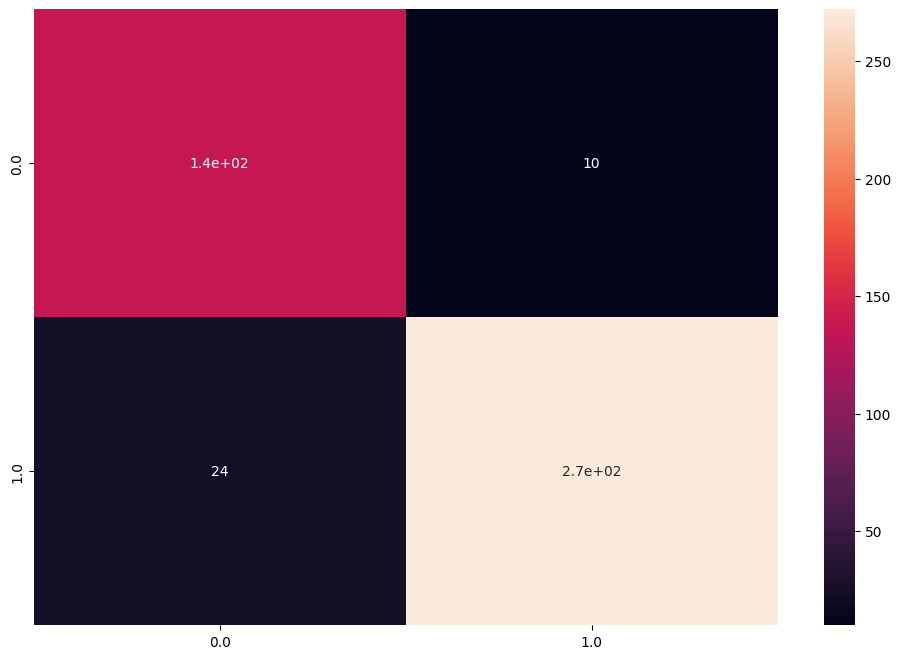

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
c1=confusion_matrix(y_test,y_predicted,labels=mdl.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(c1,annot=True,xticklabels=mdl.classes_,yticklabels=mdl.classes_)